# Hello World: Sequential edition


An example showing how to use Keras [Sequential](https://www.tensorflow.org/guide/keras) in TensorFlow 2.0. To train our model, we'll use the built-in `model.fit` method.

You can find more details about this style, and how it compares to the next one, in this [article](https://medium.com/tensorflow/what-are-symbolic-and-imperative-apis-in-tensorflow-2-0-dfccecb01021).

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
model = Sequential([
  Flatten(),
  Dense(256, 'relu'),
  Dense(128, 'relu'),
  Dense(10, 'softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000==============================] - 7s 123us/sample - loss: 0.2104 - acc: 0.9372 - val_loss: 0.1355 - val_acc: 0.9572
Epoch 2/5
60000/60000==============================] - 7s 120us/sample - loss: 0.0852 - acc: 0.9733 - val_loss: 0.0806 - val_acc: 0.9739
Epoch 3/5
60000/60000==============================] - 7s 120us/sample - loss: 0.0598 - acc: 0.9808 - val_loss: 0.0829 - val_acc: 0.9759
Epoch 4/5
60000/60000==============================] - 7s 121us/sample - loss: 0.0438 - acc: 0.9859 - val_loss: 0.0799 - val_acc: 0.9776
Epoch 5/5
60000/60000==============================] - 7s 121us/sample - loss: 0.0345 - acc: 0.9886 - val_loss: 0.0793 - val_acc: 0.9791


If you take a look at the accuracy on the training and validation data in the plot below, you'll notice something interesting is happening - they diverge! While the accuracy on the training data continues to incease, the validation accuracy plateaus (and may even begin to *decrease* if you continue to train). We see a similar pattern in the plot for the loss, reversed. 

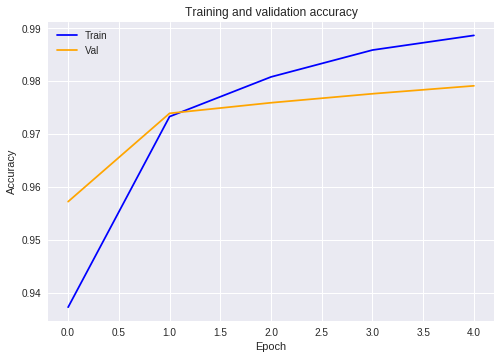

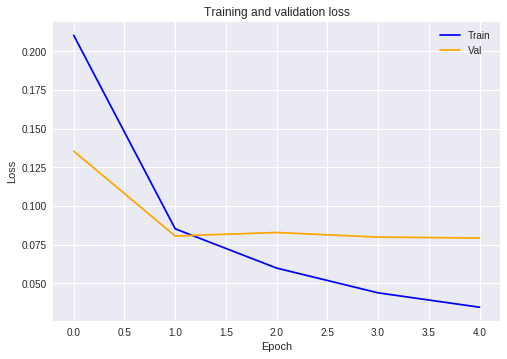

In [0]:
# The history object contains results on the training and test
# sets for each epoch
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(len(acc))

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, color='blue', label='Train')
plt.plot(epochs, val_acc, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

_ = plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, color='blue', label='Train')
plt.plot(epochs, val_loss, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

### Next steps

* Try `hello-subclassing.ipynb` in this repo for a different way to write this code.

You can explore these three notebooks for more details on the Sequential API.

* [Deep Learning Basics](https://github.com/lexfridman/mit-deep-learning/blob/master/tutorial_deep_learning_basics/deep_learning_basics.ipynb) (from our friends at MIT).

* [Neural Nets with Keras](https://github.com/ageron/tf2_course/blob/master/01_neural_nets_with_keras.ipynb) from [Aurelien Geron](https://twitter.com/aureliengeron), who is working on a TensorFlow 2.0 book now (an updated version of Hands-On Machine Learning with Scikit-Learn and TensorFlow).